<h1 style='text-align:center'>Modeling Time Series</h1>

## Auto-regressive Time Series Model

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step. It is one of the simplest time series models in which we use a linear model to predict the value at the present time using the value at the previous time. 

<p style='text-align:center; font-size: 30px;'>𝑌<sub>t</sub>=𝜙<sub>1</sub>𝑌<sub>𝑡−1</sub>+𝜖<sub>𝑡</sub></p>
  
  
The numeral one (1) denotes that the next instance is solely dependent on the previous instance.  The 𝜙(phi) is a coefficient which we seek so as to minimize the error function.

The order of AR is the number of lag terms we are using to predict the present value (AR(1) uses only 1 lag - one value directly preceding the value you are trying to predict, AR(2) use the two values directly preceding the value you are trying to predict) 

#### How do we determine the order aka how many lag terms do we include? 

Using ACF and PACF! 

<img src='AR(1).png'>

## Moving Average Time Series Model

Sometimes, a past value is not a useful indicator of what value will come next. Consider a system that is subject to a lot of shocks/volatility. If a previous time period experiences a shock it may cause an error for future predictions if we just that value. A moving average model helps address this behavior. 

A moving average term in a time series model is a past error (multiplied by a coefficient).

An MA model assumes present value is related to errors in the past - includes memory of past errors


<p style='text-align: center; font-size:30px;'>𝑌<sub>t</sub>=μ + 𝜖<sub>𝑡</sub>+𝜃<sub>1</sub>𝜖<sub>𝑡−1</sub></p>

Focus on the intuition behind this model before attempting to dissect the mathematics.


For more details on how this model is fit: https://stats.stackexchange.com/questions/26024/moving-average-model-error-terms/74826#74826 

## Differencing Model aka Integrated Model

The differenced value is equal to the present value minus the value at the next lag. A time series which needs to be differenced to be made stationary is said to be an "integrated" time series.

<p>If d=0:  y<sub>t</sub>  =  Y<sub>t</sub></p>

If d=1:  y<sub>t</sub> =  Y<sub>t</sub> - Y<sub>t-1</sub>

If d=2:  y<sub>t</sub> =  (Y<sub>t</sub> - Y<sub>t-1</sub>) - (Y<sub>t-1</sub> - Y<sub>t-2</sub>)  =  Y<sub>t</sub> - 2Y<sub>t-1</sub> + Y<sub>t-2</sub>

## ARIMA

Combines AR, Differencing (I), and MA  

The differenced value is equal to the present value minus the value at the next lag. A time series which needs to be differenced to be made stationary is said to be an "integrated" time series.

<p style ='text-align:center; font-size: 30px;'>𝑌<sub>t</sub>=𝜙<sub>1</sub>𝑌<sub>𝑡−1</sub>+𝜙<sub>2</sub>𝑌<sub>𝑡−2</sub>...𝜙<sub>𝑝</sub>𝑌<sub>t−𝑝</sub>+𝜖<sub>𝑡</sub>+𝜃<sub>1</sub>𝜖<sub>𝑡−1</sub>+𝜃<sub>2</sub>𝜖<sub>𝑡−2</sub>+...𝜃<sub>𝑞</sub>𝜖<sub>𝑡−𝑞</sub></p>


ARIMA has three main parameters we need to input, p, d, & q

<b>p:</b> The number of AR terms we are going to include<br/>
<b>d:</b> The number of times we are differencing our data<br/>
<b>q:</b> The number MA terms we are going to include

## Time Series Modeling Procedure

1) Plot data, see if there are trends <br/>
2) If trends, remove them (differencing, log transform, etc) <br/>
3) If seasonal trends are there determine periodicity. <br/>
3) ACF and PACF of  data <br/>
4) Determine order of differencing, AR, or MA (or both) <br/>
5) Build Model and Evaluate 


In [2]:
import pandas as pd
from matplotlib import pyplot

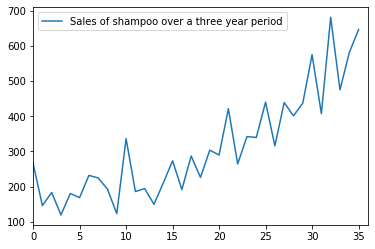

In [3]:
#read in csv
shampoo = pd.read_csv('data/shampoo.csv', header=0, usecols=[1])
#plot of data to see visualize trends
shampoo.plot()


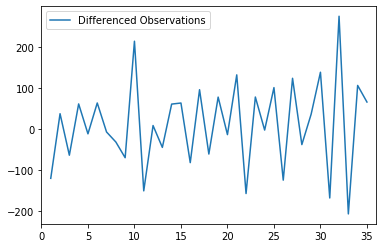

In [4]:
#get differenced values
diff = shampoo.diff().rename(index=str, columns={"Sales of shampoo over a three year period": "Differenced Observations"})
diff.plot()

> **Commentary**: One difference seems adequate to remove trends from the time series.

In [5]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Order of Difference Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Order of Difference Used      1.000000e+00
Number of Observations Used    3.300000e+01
dtype: float64


> **Commentary**: The Dickey Fuller Test confirms that one order of difference removes trends from the dataset.

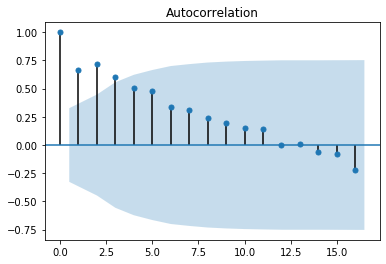

In [7]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(shampoo[:-1], alpha=.05);

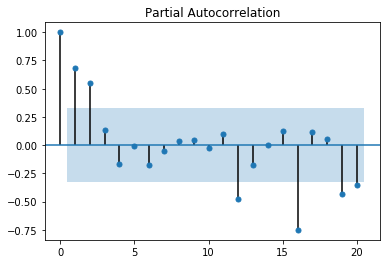

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(shampoo[:-1], alpha=.05, lags=20);

> **Commentary**: The PACF demonstrates that the lag term for the ARIMA model should be 3 due to the sharp dropoff accounted for in Partial Autocorrelation after the 3rd lag.

In [41]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))

model = ARIMA(shampoo[:-1], order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                                                css-mle   S.D. of innovations             67.833
Date:                                         Fri, 11 Oct 2019   AIC                            403.628
Time:                                                 11:29:34   BIC                            409.849
Sample:                                                      1   HQIC                           405.775
                                                                                                       
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

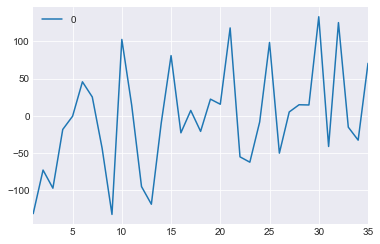

In [42]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

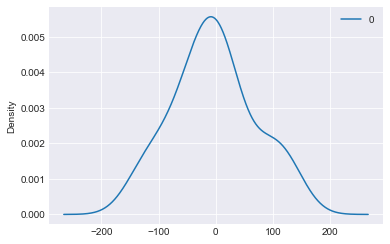

In [43]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
pyplot.show()

In [40]:
import numpy as np
np.mean((model_fit.resid ** 2))

4815.577027053456

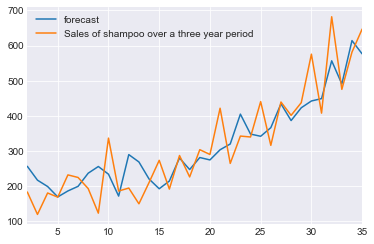

In [31]:
model_fit.plot_predict();

In [15]:
#forecast next 2 intervals
model_fit.forecast(36)[0]

array([ 589.49083548,  629.97552042,  639.31066637,  651.30893368,
        659.51709042,  676.0902433 ,  685.19478531,  698.4969353 ,
        709.81146285,  722.34903339,  733.88086168,  746.19632537,
        757.98995477,  770.10379002,  782.01302507,  794.0641213 ,
        806.01495342,  818.03416652,  830.00824248,  842.0121244 ,
        853.9959155 ,  865.99341265,  877.98160756,  889.97605182,
        901.96631106,  913.9593847 ,  925.95055717,  937.94301413,
        949.93460549,  961.9267792 ,  973.91856091,  985.91060683,
        997.90247458, 1009.89446242, 1021.88636937, 1033.87833081])

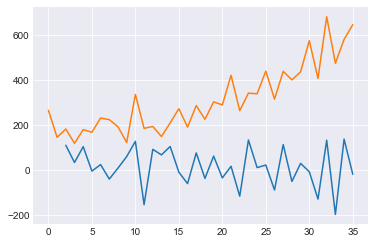

In [37]:
import numpy as np
np.mean((model_fit.resid ** 2))

## Modelling Household Electric Consumption

In [45]:
import pandas as pd

df = pd.read_csv('Global_Active_Power_Preprocessed.csv')
df.head()

,Date,Global_active_power,Sub_metering_3
0,2006-12-16,1209.176,4926.0
1,2006-12-17,3390.460,13341.0
2,2006-12-18,2203.826,14018.0
3,2006-12-19,1666.194,6197.0
4,2006-12-20,2225.748,14063.0


## Fit and Evaluate a Time Series Model

Be Sure to:
* Determine the optimal number of lags to include in the model
* Determine if the series is stationary or if differencing needs to be used
* Determine the proper order for a moving average term

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

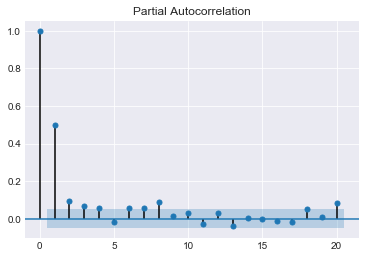

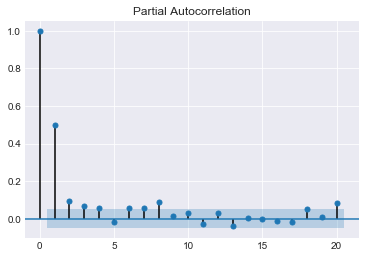

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Global_active_power, alpha=.05, lags=20)

> Commentary: Based on the PACF, it appears that we should use a lag of 2. (Notice strong dropoff after 2nd lag.)

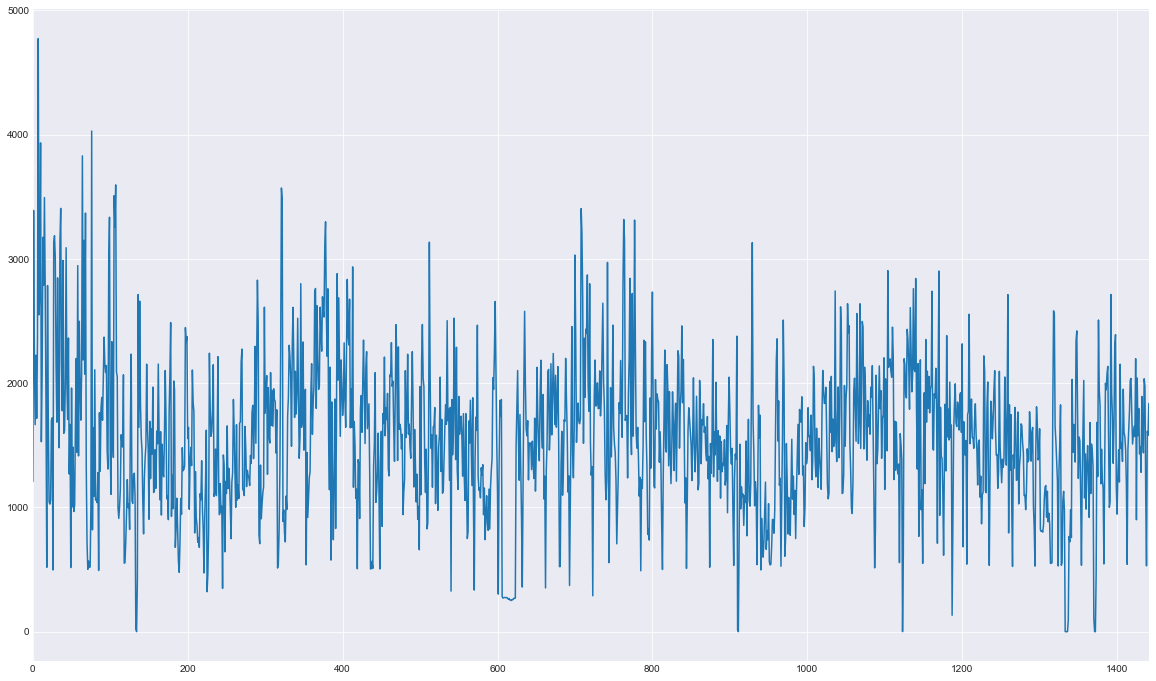

In [48]:
df.Global_active_power.plot(figsize=(20,12))

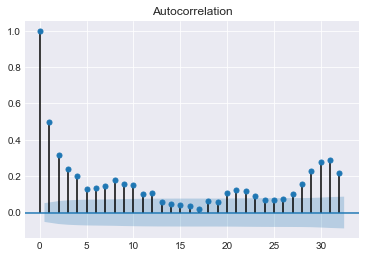

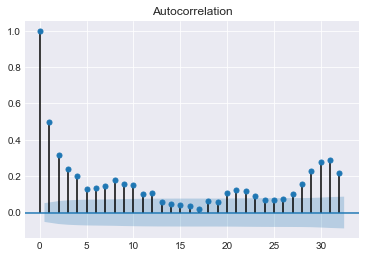

In [49]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(df.Global_active_power, alpha=.05)

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model = ARIMA(df.Global_active_power, order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               ARMA Model Results                              
Dep. Variable:     Global_active_power   No. Observations:                 1442
Model:                      ARMA(2, 0)   Log Likelihood              -11101.086
Method:                        css-mle   S.D. of innovations            533.443
Date:                 Fri, 11 Oct 2019   AIC                          22210.172
Time:                         11:30:08   BIC                          22231.267
Sample:                              0   HQIC                         22218.046
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1551.4764     30.719     50.506      0.000    1491.268    1611.684
ar.L1.Global_active_power     0.4489      0.026     17.095      0.000       0.

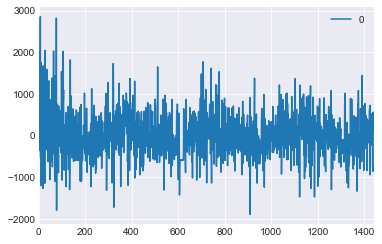

In [52]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

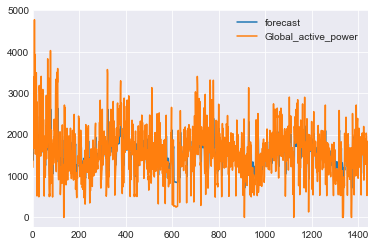

<Figure size 1440x864 with 0 Axes>

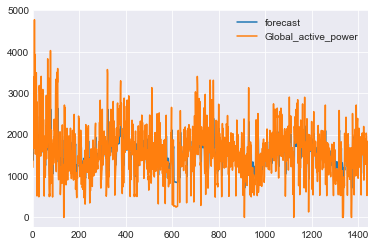

In [53]:
plt.figure(figsize=(20,12))
model_fit.plot_predict()

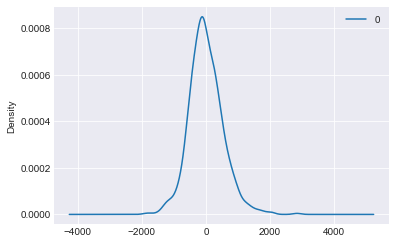

In [54]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
pyplot.show()

In [78]:
# evaluate an ARIMA model for a given order (p,d,q)
from sklearn.metrics import mean_squared_error
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [56]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [65]:
df = pd.read_csv('data/shampoo.csv').head()

In [66]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [69]:
df['Month'] = df['Month'].apply(parser)

In [70]:
df.head()

,Month,Sales of shampoo over a three year period
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [74]:
df.set_index('Month', inplace = True)

In [62]:
from pandas import datetime
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('data/shampoo.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

ValueError: time data '190Sales of shampoo over a three year period' does not match format '%Y-%m'

In [80]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=3124.621
ARIMA(0, 0, 1) MSE=4886.881
ARIMA(0, 1, 0) MSE=6288.766
ARIMA(1, 0, 0) MSE=3235.884
Best ARIMA(0, 0, 0) MSE=3124.621


## References

* [Machine Learning Mastery](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

* [Chih-Ling Hsu blog](https://chih-ling-hsu.github.io/2017/03/20/time-series).